In [108]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [109]:
# Load your dataset (make sure to adjust the file name/path)
df = pd.read_csv('MAHA_AMPARA.csv')  # Replace with your actual file name

In [110]:
# Display the first few rows of the dataframe
print(df.head())

   YEAR  MAINLY BY TRACTOR   BUFFALOE PLOUGHED   BUFFALOE MUDDED   \
0  2014              98.20%               1.80%             0.00%   
1  2015              99.50%               0.50%             0.00%   
2  2016              99.50%               0.50%             0.00%   
3  2017              98.20%               1.50%             0.30%   
4  2018              99.10%               0.90%             0.00%   

   BY MAMOTEE   MANNUAL   MACHINE    SCORE MAINLY BY TRACTOR   \
0        0.00%    27.90%    72.10%                     15.712   
1        0.00%     6.00%    94.00%                     15.920   
2        0.00%     9.70%    90.30%                     15.920   
3        0.00%    13.70%    86.30%                     15.712   
4        0.00%     4.90%    95.10%                     15.856   

    SCORE BUFFALOE PLOUGHED    SCORE BUFFALOE MUDDED   ...  \
0                      0.252                    0.000  ...   
1                      0.070                    0.000  ...   
2       

In [111]:
# Define the variables
variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

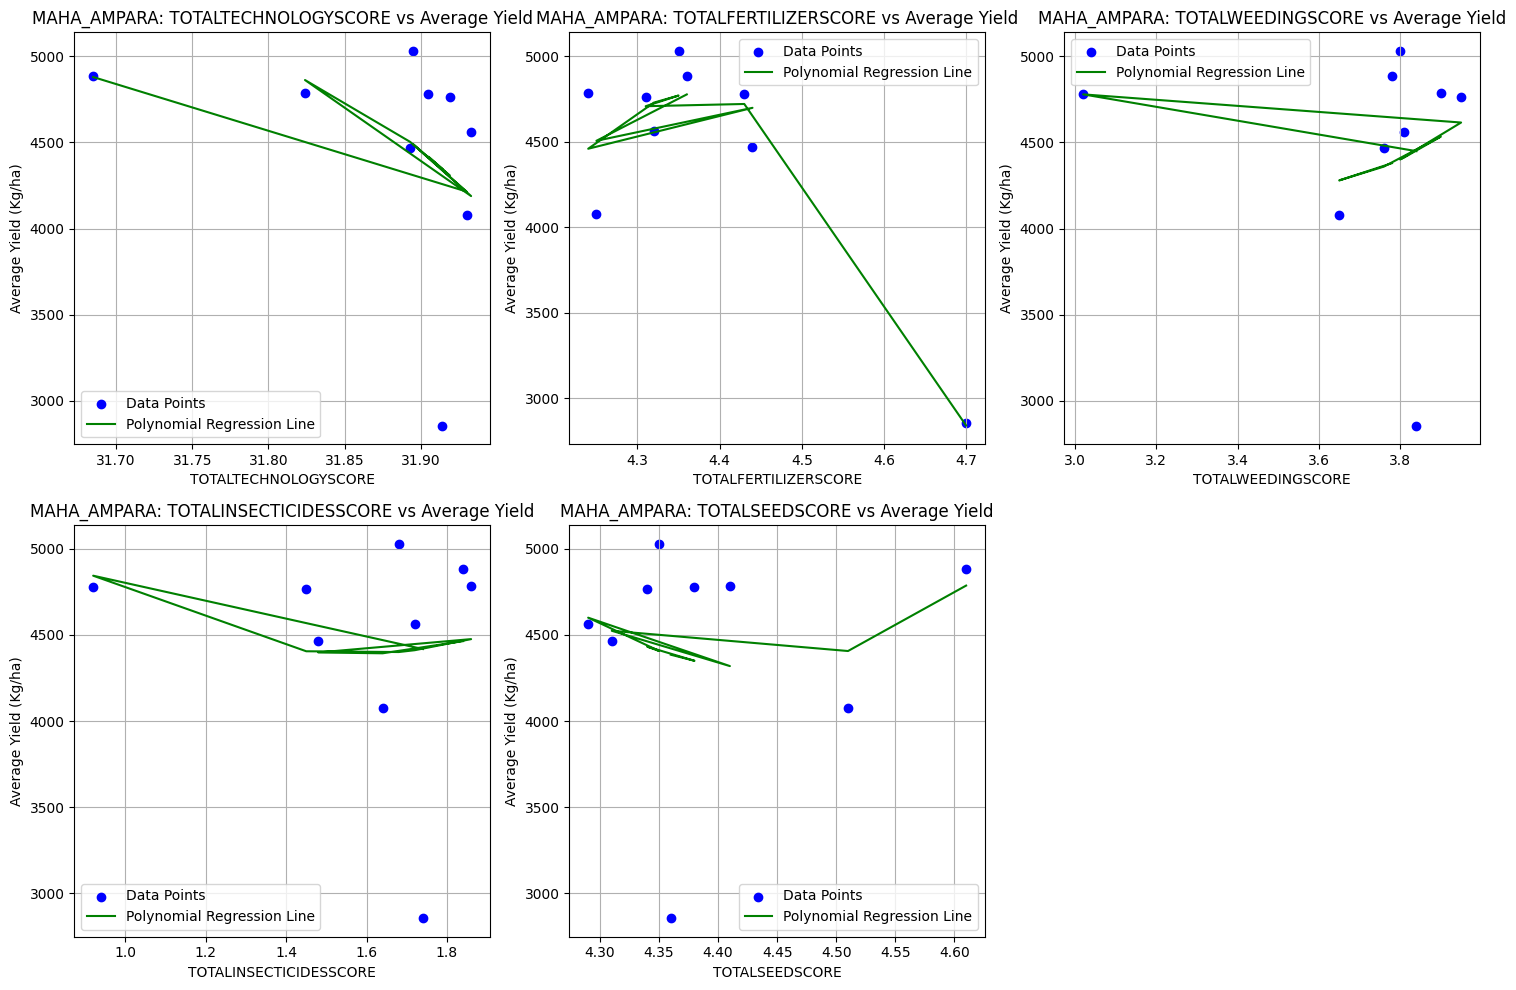

In [112]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    # Prepare the data
    X = df[[var]]  # Independent variable
    Y = df['AverageYieldKgPERha']  # Dependent variable

    # Polynomial fitting (degree 2)
    coefficients = np.polyfit(X[var].values, Y, 2)  # Change degree as needed
    polynomial = np.poly1d(coefficients)

    # Predict values
    Y_poly_pred = polynomial(X[var].values)

    # Plotting
    plt.subplot(2, 3, i + 1)
    plt.scatter(X, Y, color='blue', label='Data Points')
    plt.plot(X, Y_poly_pred, color='green', label='Polynomial Regression Line')  # Polynomial regression line
    plt.title(f'MAHA_AMPARA: {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

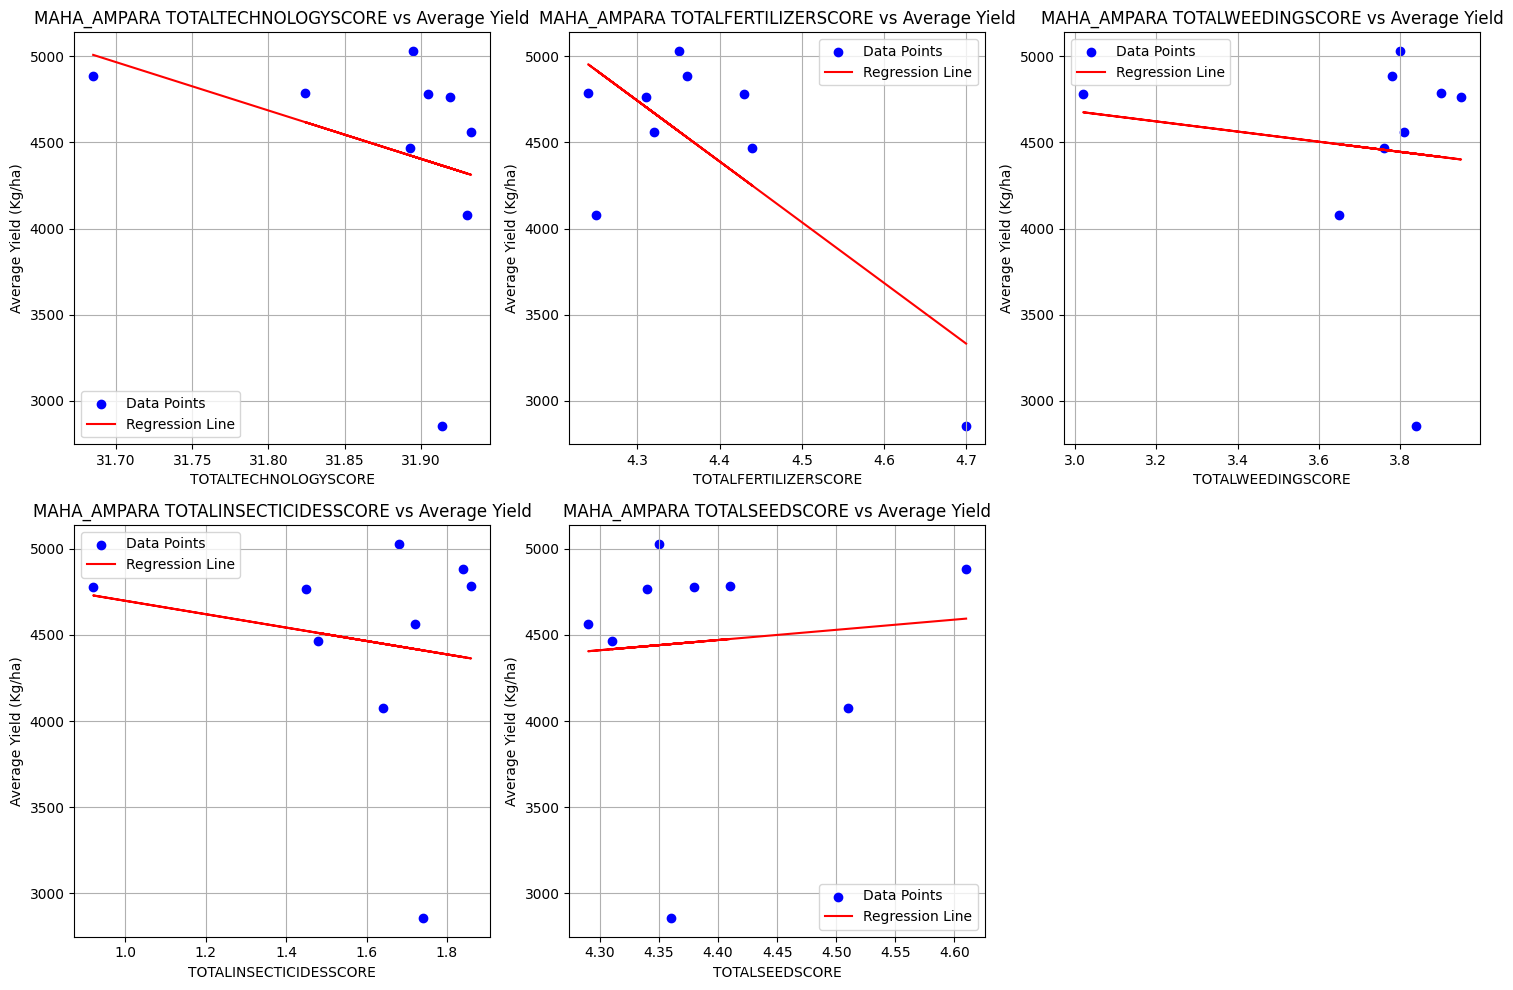

In [113]:
# Define the variables to plot
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    # Prepare the data
    X = df[[var]]  # Independent variable
    Y = df['AverageYieldKgPERha']  # Dependent variable

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Predict values
    Y_pred = model.predict(X)

    # Plotting
    plt.subplot(2, 3, i + 1)
    plt.scatter(X, Y, color='blue', label='Data Points')
    plt.plot(X, Y_pred, color='red', label='Regression Line')  # Regression line
    plt.title(f'MAHA_AMPARA {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [114]:
# Define the variables to calculate correlation with Average Yield
#variables = ['TOTALSEEDSCORE', 'TOTALWEEDINGSCORE', 'TOTALFERTILIZERSCORE', 'TOTALTECHNOLOGYSCORE', 'TOTALINSECTICIDESSCORE']

# Calculate and print correlations
for var in variables:
    correlation = df[var].corr(df['AverageYieldKgPERha'])
    print(f'MAHA_AMPARA_Correlation between {var} and Average Yield: {correlation}')

MAHA_AMPARA_Correlation between TOTALTECHNOLOGYSCORE and Average Yield: -0.3342425276630403
MAHA_AMPARA_Correlation between TOTALFERTILIZERSCORE and Average Yield: -0.737530403066443
MAHA_AMPARA_Correlation between TOTALWEEDINGSCORE and Average Yield: -0.1228083289654133
MAHA_AMPARA_Correlation between TOTALINSECTICIDESSCORE and Average Yield: -0.16880494237262206
MAHA_AMPARA_Correlation between TOTALSEEDSCORE and Average Yield: 0.0914118944933011


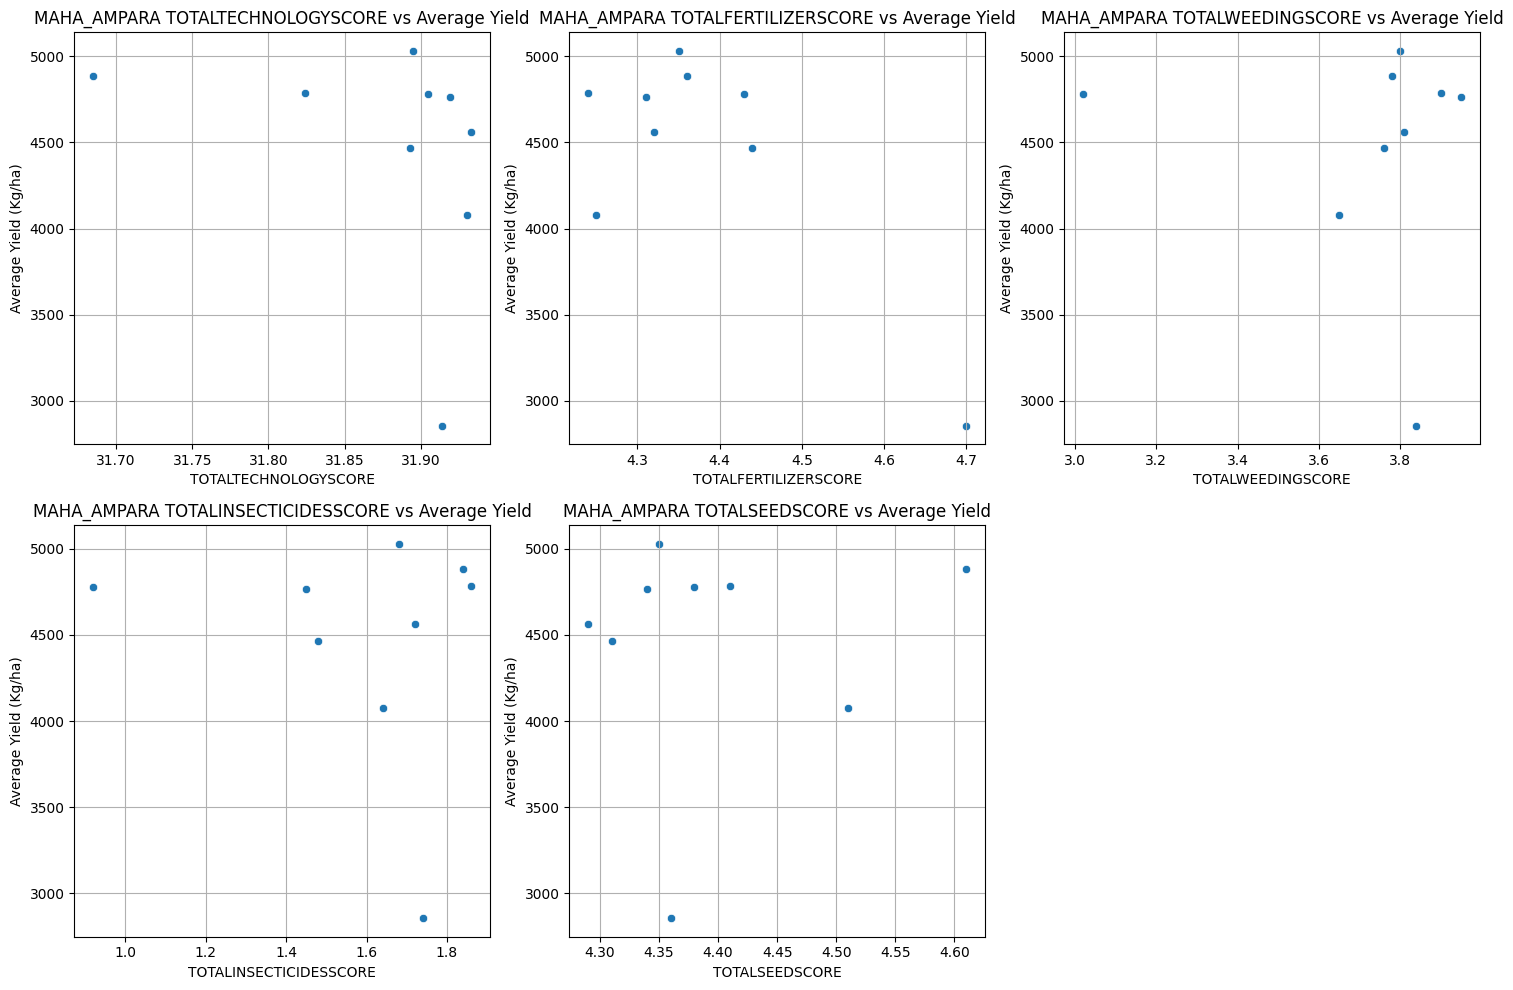

In [115]:
# Plotting scatter plots for each variable against Average Yield
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[var], y=df['AverageYieldKgPERha'])
    plt.title(f'MAHA_AMPARA {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.grid(True)

plt.tight_layout()
plt.show()

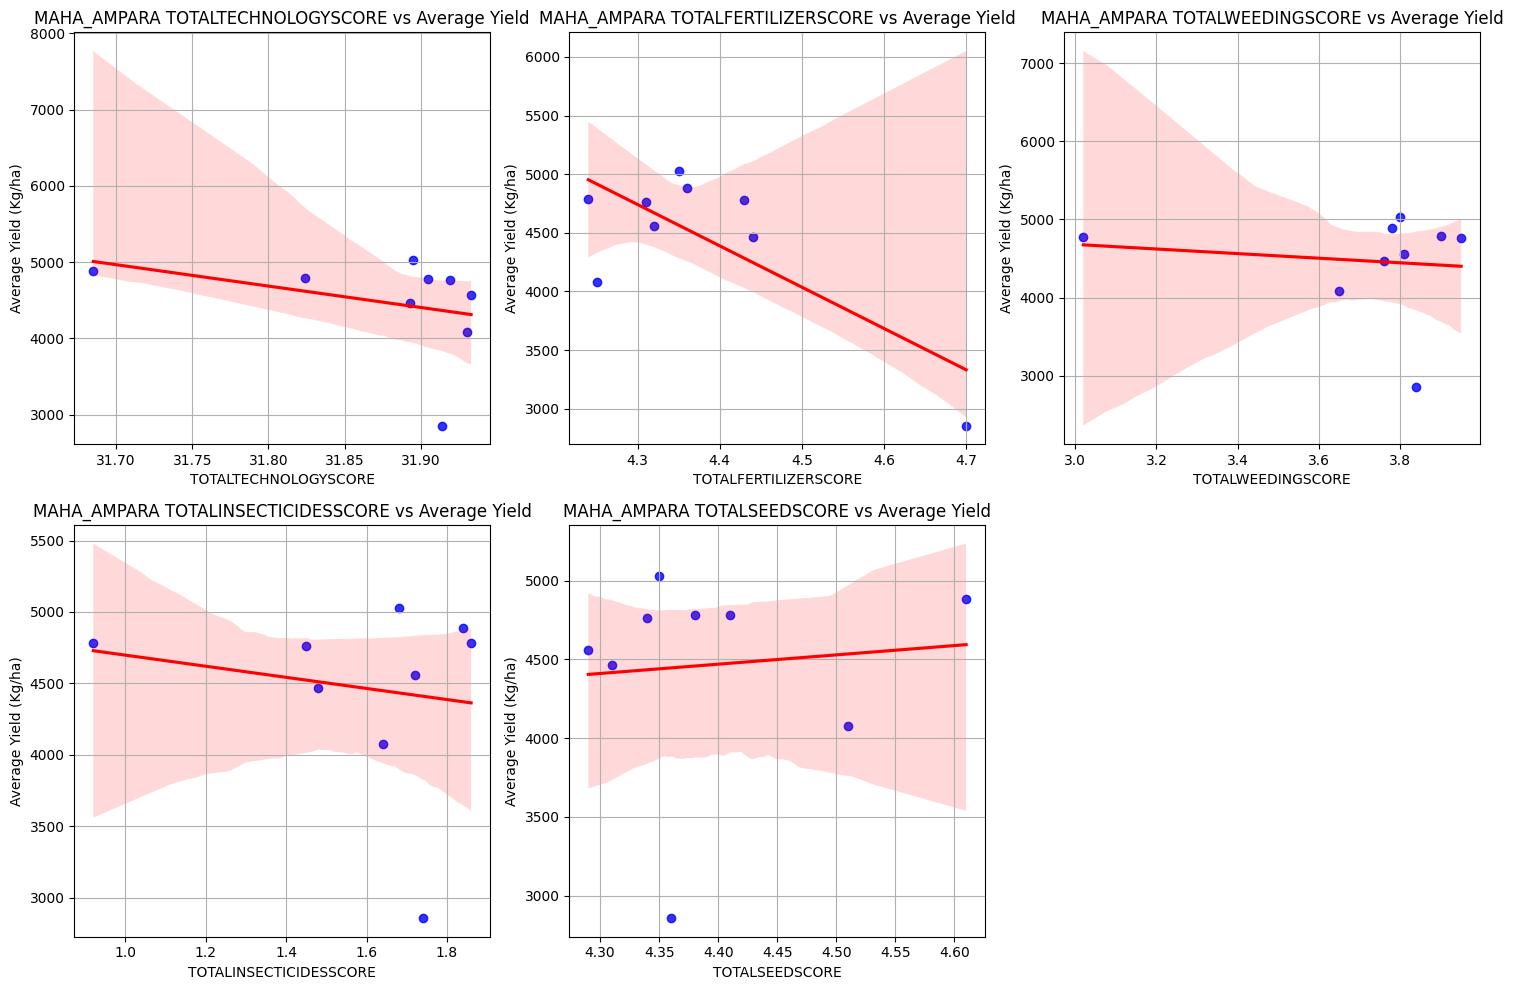

In [116]:
# Define the variables to plot
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=df[var], y=df['AverageYieldKgPERha'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'MAHA_AMPARA {var} vs Average Yield')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.grid(True)

plt.tight_layout()
plt.show()


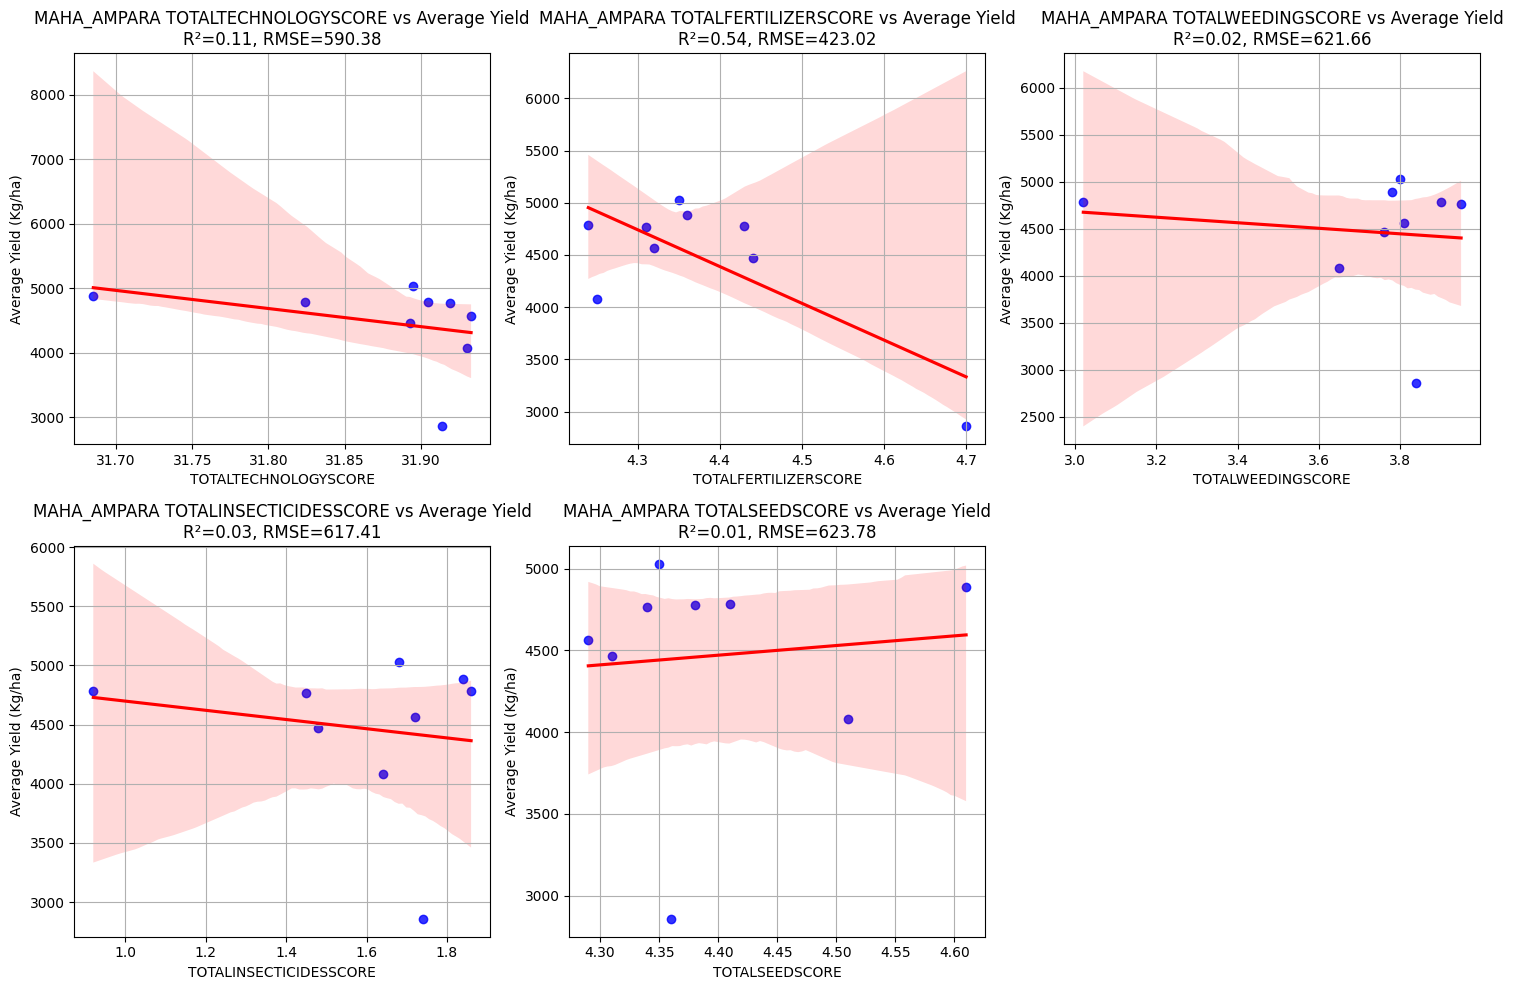

In [117]:
# Define the variables to plot
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)

    # Fit the regression model
    X = df[var]
    y = df['AverageYieldKgPERha']

    # Add a constant to the model (intercept)
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()

    # Get predictions
    predictions = model.predict(X_with_const)

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predictions - y) ** 2))

    # Plotting
    sns.regplot(x=X, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

    # Title and labels
    plt.title(f'MAHA_AMPARA {var} vs Average Yield\nR²={model.rsquared:.2f}, RMSE={rmse:.2f}')
    plt.xlabel(var)
    plt.ylabel('Average Yield (Kg/ha)')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [118]:
# Define the variables to calculate correlation with Average Yield
#variables = ['TOTALTECHNOLOGYSCORE', 'TOTALFERTILIZERSCORE', 'TOTALWEEDINGSCORE', 'TOTALINSECTICIDESSCORE', 'TOTALSEEDSCORE']

# Calculate and print both Pearson and Spearman correlations
for var in variables:
    pearson_corr = df[var].corr(df['AverageYieldKgPERha'])
    spearman_corr = df[var].corr(df['AverageYieldKgPERha'], method='spearman')
    print(f'MAHA_AMPARA_Correlation between {var} and Average Yield:')
    print(f'  Pearson Correlation: {pearson_corr}')
    print(f'  Spearman Correlation: {spearman_corr}\n')

MAHA_AMPARA_Correlation between TOTALTECHNOLOGYSCORE and Average Yield:
  Pearson Correlation: -0.3342425276630403
  Spearman Correlation: -0.5833333333333334

MAHA_AMPARA_Correlation between TOTALFERTILIZERSCORE and Average Yield:
  Pearson Correlation: -0.737530403066443
  Spearman Correlation: -0.25

MAHA_AMPARA_Correlation between TOTALWEEDINGSCORE and Average Yield:
  Pearson Correlation: -0.1228083289654133
  Spearman Correlation: 0.049999999999999996

MAHA_AMPARA_Correlation between TOTALINSECTICIDESSCORE and Average Yield:
  Pearson Correlation: -0.16880494237262206
  Spearman Correlation: 0.18333333333333335

MAHA_AMPARA_Correlation between TOTALSEEDSCORE and Average Yield:
  Pearson Correlation: 0.0914118944933011
  Spearman Correlation: 0.2333333333333333

